# TOP-100 YouTube channels dataset

## Importing libs and the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
ds = pd.read_csv("top-100-youtube-channels-dataset.csv")
ds.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,Music,2006
1,2,YouTube Movies,150000000,1.671230e+11,NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,1.268230e+11,751.0,Education,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
4,5,Music,116000000,7.843787e+10,NaN,Music,2013


Checking the rows count in the dataset.

In [20]:
ds.describe()

,rank,subscribers,video views,video count,started
count,100.000000,1.000000e+02,1.000000e+02,95.000000,100.000000
mean,50.500000,5.336300e+07,2.993079e+10,15847.221053,2010.800000
std,29.011492,2.869713e+07,2.988974e+10,40955.200388,5.504819
min,1.000000,3.220000e+07,2.647950e+09,45.000000,1970.000000
25%,25.750000,3.620000e+07,1.485854e+10,393.500000,2007.750000
50%,50.500000,4.320000e+07,2.209857e+10,1139.000000,2012.000000
75%,75.250000,5.710000e+07,3.053425e+10,4986.000000,2014.000000
max,100.000000,2.130000e+08,1.880740e+11,209351.000000,2018.000000


Checking what columns we have

In [21]:
list(ds.columns)

['rank ',
 'youtuber',
 'subscribers ',
 'video views ',
 'video count ',
 'category ',
 'started ']

Column names have extra whitespaces, let's remove them.

In [22]:
ds.columns = ds.columns.str.strip()

In [23]:
columns = list(ds.columns)
columns

['rank',
 'youtuber',
 'subscribers',
 'video views',
 'video count',
 'category',
 'started']

Now, the column names don't contain extra whitespaces

The dataset is pretty simple and well-prepared. Let's start.

## Preparing

Checking the count of null or empty values in dataset.

In [24]:
ds.isnull().sum()

rank           0
youtuber       0
subscribers    0
video views    0
video count    5
category       0
started        0
dtype: int64

Some channel don't have vidoes at all. Let's check them.

In [25]:
ds[ds.isnull().any(axis=1)]

,rank,youtuber,subscribers,video views,video count,category,started
1,2,YouTube Movies,150000000,1.671230e+11,NaN,Film & Animation,2015
4,5,Music,116000000,7.843787e+10,NaN,Music,2013
8,9,Gaming,92100000,7.169247e+10,NaN,Gaming,2013
14,15,Sports,75100000,2.215664e+10,NaN,Sports,2013
76,77,News,36000000,2.496052e+10,NaN,News & Politics,2013


We see the channels without vidoes. It's video catergories, created by YouTube. Let's remove them from our dataset, because they are not "real" channels.

In [26]:
indeces = ds.loc[ds["video count"].isnull()].index

In [27]:
ds = ds.drop(indeces)
ds

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,1.268230e+11,751.0,Education,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
5,6,PewDiePie,111000000,2.826078e+10,4472.0,Gaming,2010
6,7,MrBeast,93900000,1.541730e+10,721.0,Entertainment,2012
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,1.801184e+10,5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,1.514486e+10,584.0,Entertainment,2017
97,98,Ryan's World,32400000,5.131260e+10,2155.0,Entertainment,2015
98,99,ABP News,32300000,9.850741e+09,209351.0,People & Blogs,2012


Now, we don't have rows with null or empty values.

## Analytics

Let's build some plots to visualize the data in the dataset. Importing required stuff.

In [28]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

### TOP-20 Channels by subscribers

The dataset seems to be sorted by the count for subscribers already, but anyway, let's do this just to be sure. 

In [29]:
ds = ds.sort_values(by=['subscribers'], ascending=False)
ds[:20]

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,1.268230e+11,751.0,Education,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
5,6,PewDiePie,111000000,2.826078e+10,4472.0,Gaming,2010
6,7,MrBeast,93900000,1.541730e+10,721.0,Entertainment,2012
7,8,Kids Diana Show,93800000,7.329642e+10,977.0,People & Blogs,2015
9,10,Like Nastya,91000000,7.420485e+10,670.0,People & Blogs,2016
10,11,WWE,87600000,6.796048e+10,60699.0,Sports,2007
11,12,Zee Music Company,83300000,4.629123e+10,6265.0,Music,2014
12,13,Vlad and Niki,80900000,6.244451e+10,443.0,Entertainment,2018


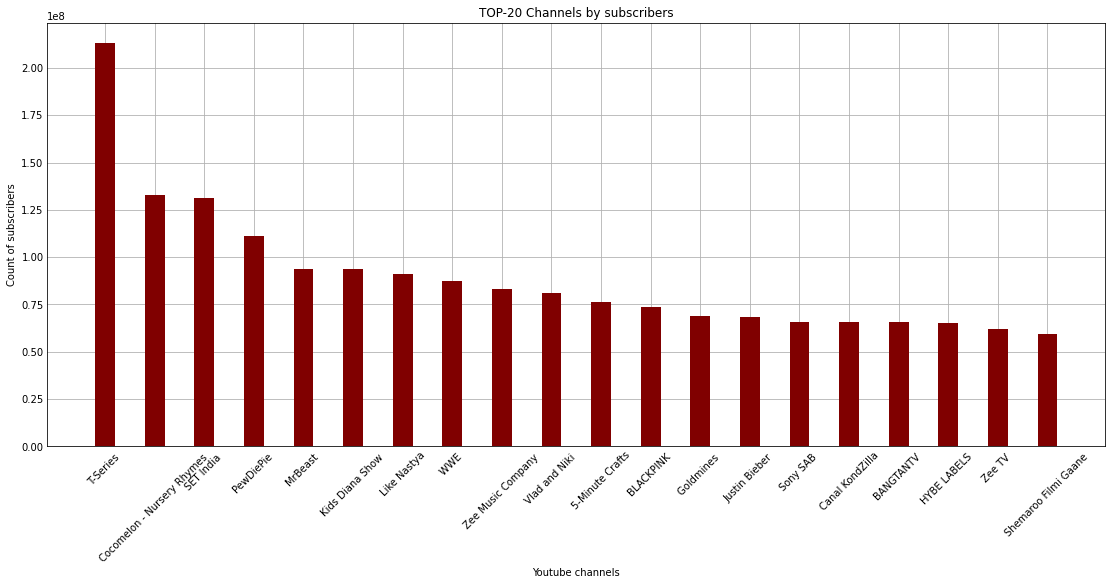

In [30]:
# creating the bar plot
fig = plt.figure(figsize = (15, 6))
plt.bar(ds['youtuber'][:20], ds['subscribers'][:20], color ='maroon', width = .4)

plt.xlabel("Youtube channels")
plt.xticks(rotation = 45)
plt.ylabel("Count of subscribers")
plt.title("TOP-20 Channels by subscribers")
plt.show()

### TOP-20 Channels by views

Sorting the dataset by video views.

In [31]:
ds = ds.sort_values(by=['video views'], ascending=False)
ds[:20]

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,Music,2006
2,3,Cocomelon - Nursery Rhymes,133000000,1.268230e+11,751.0,Education,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
18,19,Sony SAB,65900000,7.588549e+10,50810.0,Shows,2007
9,10,Like Nastya,91000000,7.420485e+10,670.0,People & Blogs,2016
7,8,Kids Diana Show,93800000,7.329642e+10,977.0,People & Blogs,2015
10,11,WWE,87600000,6.796048e+10,60699.0,Sports,2007
12,13,Vlad and Niki,80900000,6.244451e+10,443.0,Entertainment,2018
26,27,Movieclips,56600000,5.731791e+10,38746.0,Film & Animation,2006
97,98,Ryan's World,32400000,5.131260e+10,2155.0,Entertainment,2015


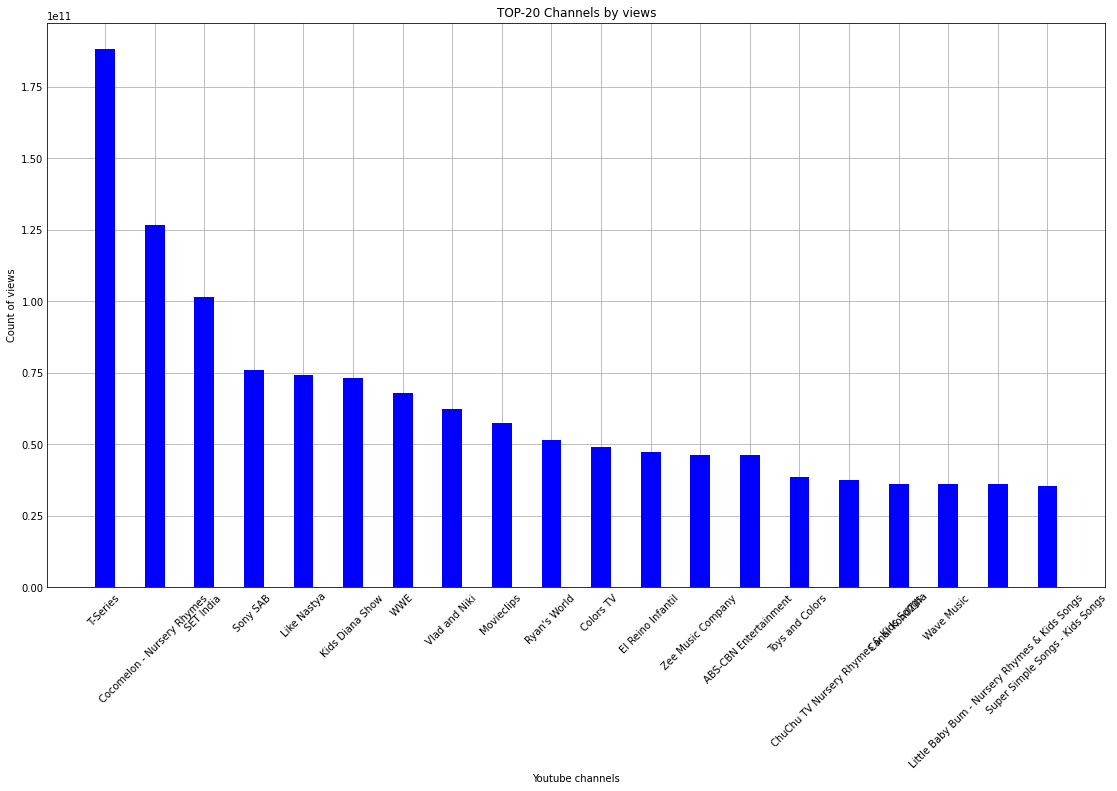

In [32]:
fig = plt.figure(figsize = (15, 8))
plt.bar(ds['youtuber'][:20], ds['video views'][:20], color ='blue', width = .4)

plt.xlabel("Youtube channels")
plt.xticks(rotation = 45)
plt.ylabel("Count of views")
plt.title("TOP-20 Channels by views")
plt.show()

### Subscribers/views ratio plot

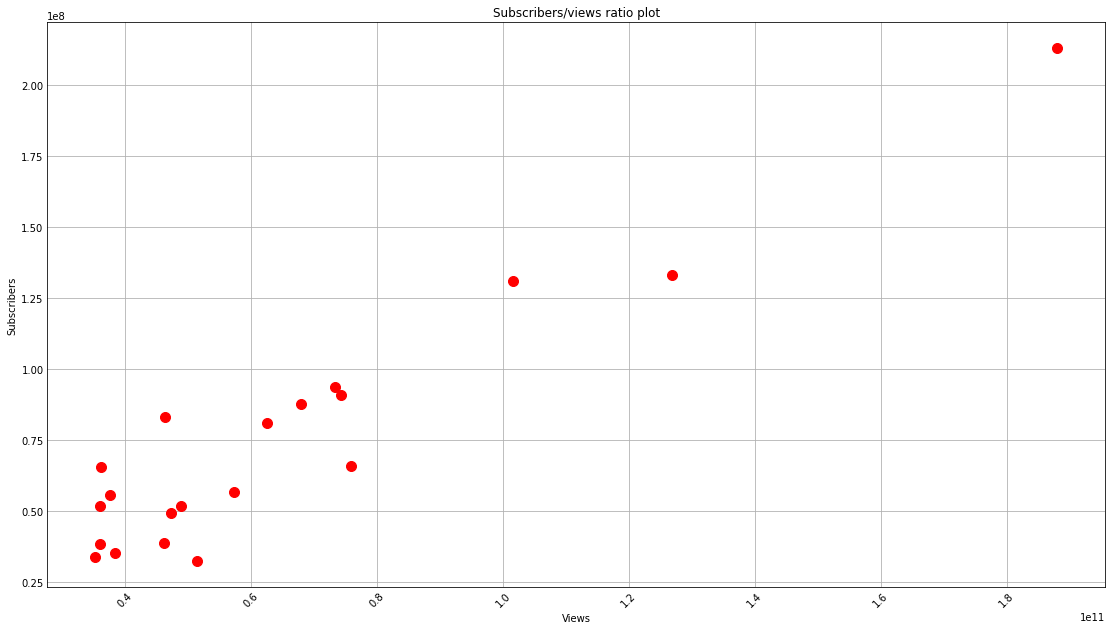

In [33]:
fig = plt.figure(figsize = (15, 8))

views = ds['video views'][:20]
subscribers = ds['subscribers'][:20]
plt.scatter(views, subscribers, color='red', s=100)

plt.xlabel("Views")
plt.xticks(rotation = 45)
plt.ylabel("Subscribers")
plt.title('Subscribers/views ratio plot')
plt.show()

In [38]:
ds[['video views']].mean()

video views    2.767062e+10
dtype: float64